# Анализ поведения потребителей

В качестве учебного проекта используется тестовый датасет «Telco Customer Churn» взятый с сайта [kaggle.com]( http://kaggle.com).

__Задача__: Создать классификатор предсказывающий отток потребителей из компании «Telco».

__Расшифровка данных__:
- customerID : ID клиента
- gender : Пол клиента
- SeniorCitizen : Является ли клиент пенсионером (Yes, No)
- Partner : Есть ли у клиента «партнер» (Yes, No)
- Dependents : Есть ли у клиента иждивенцы (Yes, No)
- tenure : Количество месяцев, в течение которых клиент пользовался услугами компании
- PhoneService : Подулючен ли телефонный сервис (Yes, No)
- MultipleLines : Подключен ли режим «MultipleLines» (Yes, No, No phone service)
- InternetService : Интернет-провайдер у клиента (DSL, Fiber optic, No)
- OnlineSecurity : Пользуется ли клиента антивирусом (Yes, No, No internet service)
- OnlineBackup : Использует ли клиент удаленное резервное копирование (Yes, No, No internet service)
- DeviceProtection : Использует ли клиента защиту устройства (Yes, No, No internet service)
- TechSupport : Использьзует ли клиент техническую поддержку (Yes, No, No internet service)
- StreamingTV : Использьзует ли клиент стриминг-сервис на тв (Yes, No, No internet service)
- StreamingMovies : Смотрит ли клиент кино с помощью стриминга (Yes, No, No internet service)
- Contract : Тип договора клиента (Month-to-month, One year, Two year)
- PaperlessBilling : Использьзует ли клиент «небумажные» квитанции (Yes, No)
- PaymentMethod : Способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : Ежемесячная оплата
- TotalCharges : Общая сумма, взимаемая с клиента
- Churn : Ушел ли клиент (Yes or No)
    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
telco = pd.read_csv('/Users/User/Desktop/Projects/telco_churn.csv')

## Первичный анализ и подготовка данных

In [4]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#проверим на недостающие значения
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Проверим пробелы в столбце TotalCharges, который нужно менять в тип Float
telco['TotalCharges'] = pd.to_numeric(telco.TotalCharges, errors='coerce')
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Изменим тип у TotalCharges, чтобы он соответствовал его смыслу и уберем пробелы
telco.dropna(inplace = True)

In [8]:
#переименуем названия столбцов в более удобный вид и уберем ID
telco = telco.drop(['customerID'], axis = 1)

Количество оставшихся пользователей: 73.5 %
Количество ушедших пользователей: 26.5 %


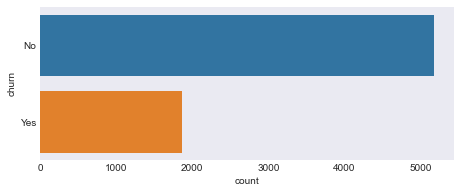

In [9]:
#Посмотрим на распределение Churn 
print('Количество оставшихся пользователей:',
      round(telco.churn[telco['churn'] == "No"].count()/telco.churn.count(),3)*100,'%') 
print('Количество ушедших пользователей:',
      round(telco.churn[telco['churn'] == "Yes"].count()/telco.churn.count(),3)*100,'%')
plt.style.use("seaborn-dark")
sns.catplot(y="churn", kind="count", data=telco, height=2.6, aspect=2.5, orient='h');

Рассмотрим связь оттока клиентов с количественными переменными в данных

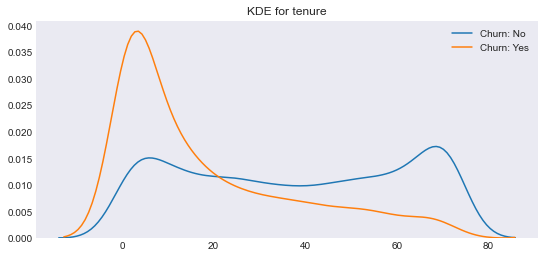

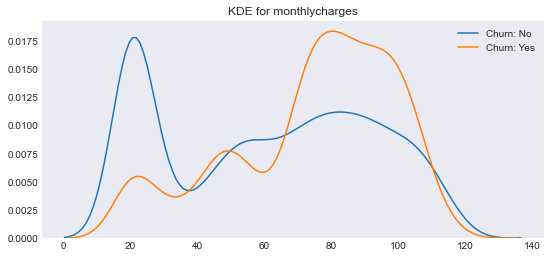

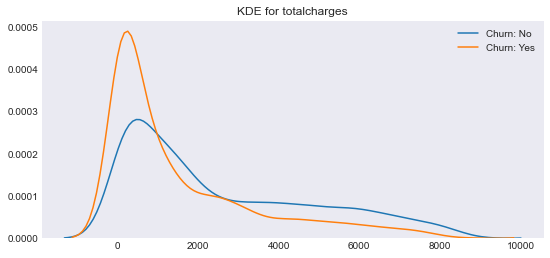

In [10]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telco[telco['churn'] == 'No'][feature], label= 'Churn: No')
    ax1 = sns.kdeplot(telco[telco['churn'] == 'Yes'][feature], label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('monthlycharges')
kdeplot('totalcharges')

__Можно сделать выводы, что клиенты имееют большую вероятность уйти:__
- Если пользуются услугами меньше 20 месяцев 
- Платят больше 60 долл.

Посмотрим на распеделение оттока по остальным параметрам

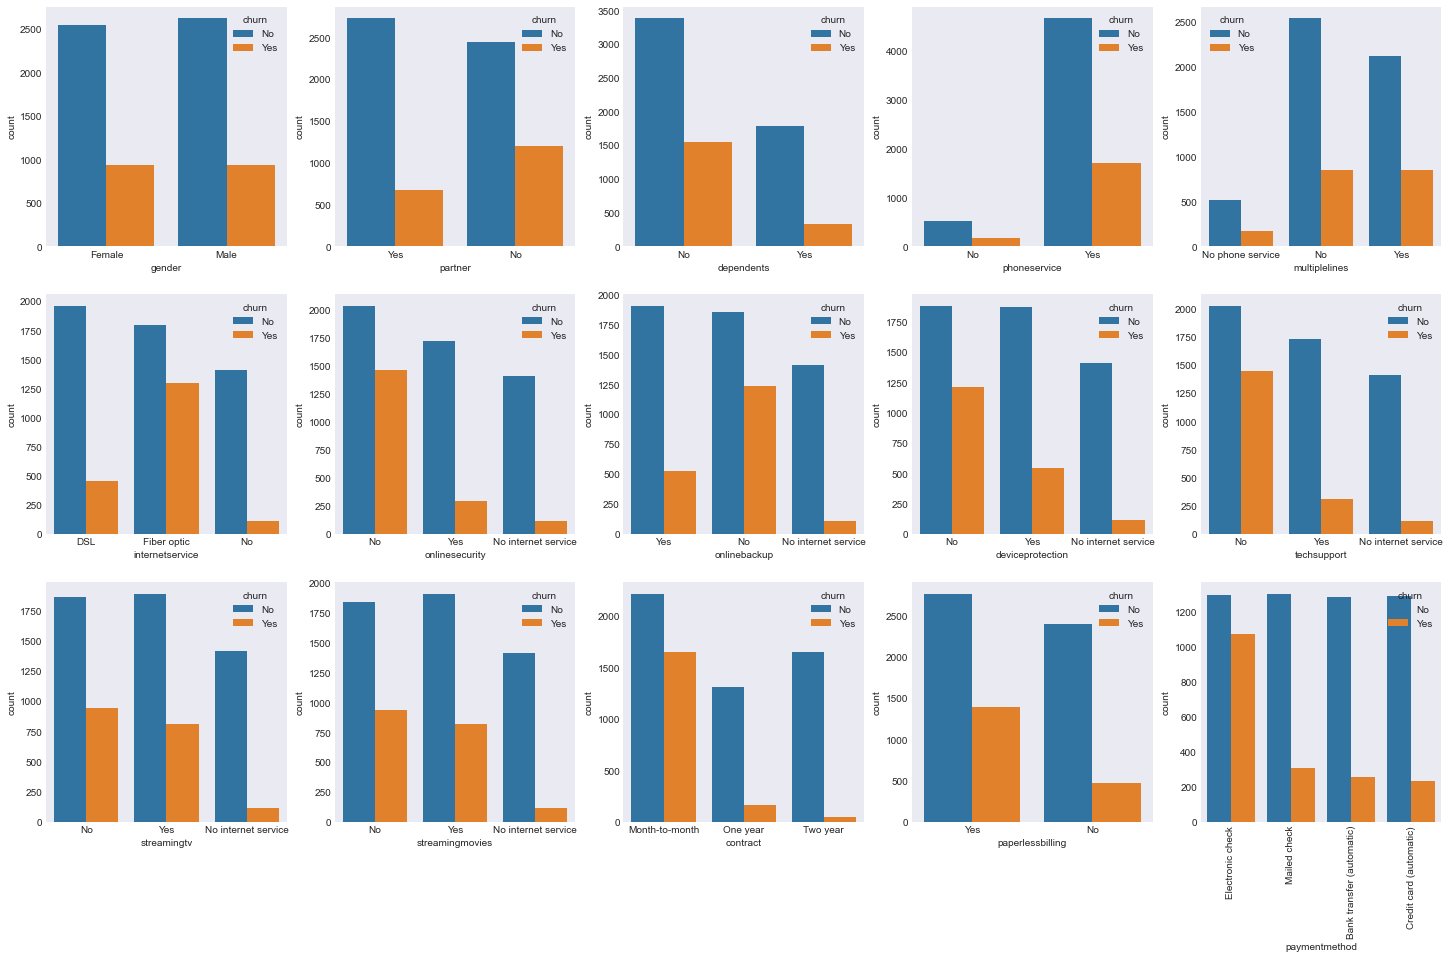

In [11]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
plt.style.use("seaborn-dark")
sns.countplot(x = "gender", data = telco,hue='churn', ax=axes[0][0])
sns.countplot(x = "partner", data = telco,hue='churn',ax=axes[0][1])
sns.countplot(x = "dependents", data = telco,hue='churn', ax=axes[0][2])
sns.countplot(x = "phoneservice", data = telco,hue='churn', ax=axes[0][3])
sns.countplot(x = "multiplelines", data = telco,hue='churn', ax=axes[0][4])
sns.countplot(x = "internetservice", data = telco,hue='churn', ax=axes[1][0])
sns.countplot(x = "onlinesecurity", data = telco,hue='churn', ax=axes[1][1])
sns.countplot(x = "onlinebackup", data = telco,hue='churn', ax=axes[1][2])
sns.countplot(x = "deviceprotection", data = telco,hue='churn', ax=axes[1][3])
sns.countplot(x = "techsupport", data = telco,hue='churn', ax=axes[1][4])
sns.countplot(x = "streamingtv", data = telco,hue='churn', ax=axes[2][0])
sns.countplot(x = "streamingmovies", data = telco,hue='churn', ax=axes[2][1])
sns.countplot(x = "contract", data = telco,hue='churn', ax=axes[2][2])
sns.countplot(x = "paperlessbilling", data = telco,hue='churn', ax=axes[2][3])
ax = sns.countplot(x = "paymentmethod", data = telco,hue='churn', ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

__Видно что отток происходит среди тех, кто:__
- Не использует дополнительные сервисы компании
- Является клиентом «Fiber optic»
- Использует способ оплаты «Electronic check»

In [9]:
#Переведем искомую переменную 
telco['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telco['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [10]:
#Переведем все категориальные переменные в фиктивные
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
telco = telco.apply(lambda x: object_to_int(x))
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [12]:
# Выделим искомое значение в переменную Y
y = telco['Churn'].values
X = telco.drop(columns = ['Churn'])

# Для улучшения работы алгоритмов приведем данные к виду от 0 до 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [13]:
# Разделим на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Поробуем протестировать два алгоритма классификации для решения этой задачи: логистическую регрессию и градиентный бустинг.

## Логистическая регрессия

In [14]:
# Обучим модель
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400)#Увеличим количество итераций,т.к. по умолчанию их 100
result = model.fit(X_train, y_train)

In [22]:
from sklearn import metrics
prediction_test = model.predict(X_test)

print ('accuracy_score_LogisticRegression:', metrics.accuracy_score(y_test, prediction_test).round(3))
print ('precision_score_LogisticRegression:', metrics.precision_score(y_test, prediction_test).round(2))
print ('recall_score_LogisticRegression:', metrics.recall_score(y_test, prediction_test).round(2))
print ('f1_score_LogisticRegression:', metrics.f1_score(y_test, prediction_test).round(2))
print ('roc_auc_score_LogisticRegression:', metrics.roc_auc_score(y_test, prediction_test).round(2))

accuracy_score_LogisticRegression: 0.801
precision_score_LogisticRegression: 0.65
recall_score_LogisticRegression: 0.53
f1_score_LogisticRegression: 0.58
roc_auc_score_LogisticRegression: 0.71


__roc_auc_score__ составил 0.71, модель можно считать приемлимой

## XGboost

In [16]:
#Ипортируем нужные библеотеки для обучения

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [17]:
#Подберем параметры модели, так как данных относительно много вместо GridSearchCV воспользуемся RandomizedSearchCV

clf = XGBClassifier(objective = 'binary:logistic')#Выбираем логистическую функцию потерь,т.к. бинарная классификация
parametrs = { 'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],#Вес каждого дерева
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000, 5000],# количество деревьев
              'max_depth': range(1,6),# Максимальная глубина деревьев
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],#Параметр L1-Ругляизации
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}#Параметр L2-Ругляизации

In [18]:
#Обучим модель
xgb_clf = RandomizedSearchCV(clf,parametrs,cv=5,n_jobs=-1,verbose=3)
xgb_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [19]:
#Проверим модель на тестовых данных
best_tree = xgb_clf.best_estimator_
predictions = best_tree.predict(X_test)

In [21]:
from sklearn import metrics
print ('accuracy_score_XGboost', metrics.accuracy_score(y_test,predictions).round(3))
print ('precision_score_XGboost', metrics.precision_score(y_test,predictions).round(2))
print ('recall_score_XGboost', metrics.recall_score(y_test,predictions).round(2))
print ('f1_score_XGboost', metrics.f1_score(y_test,predictions).round(2))
print ('roc_auc_score_XGboost', metrics.roc_auc_score(y_test,predictions).round(2))

accuracy_score_XGboost 0.803
precision_score_XGboost 0.66
recall_score_XGboost 0.51
f1_score_XGboost 0.58
roc_auc_score_XGboost 0.71


__roc_auc_score__ также составил 0.71, модель можно считать приемлимой

__Модели показали одинаковые результаты, roc_auc_score удовлетворительный.__